Zadanie 1

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")
print(df.head())
print(df.info())
print(df.describe())

         observation_id               submitted_time  gender  \
0  wmn_4503683847159808  2020-07-09 23:19:01.982 UTC  Female   
1  wmn_4503772699295744  2020-07-09 21:22:15.864 UTC  Female   
2  wmn_4504010469146624  2020-07-10 05:09:07.359 UTC  Female   
3  wmn_4504035500752896   2020-07-11 16:59:49.85 UTC  Female   
4  wmn_4504181395423232  2020-07-11 18:43:35.954 UTC  Female   

                  age                         geography  \
0  26 to 35 years old  City center or metropolitan area   
1  16 to 25 years old                             Rural   
2  16 to 25 years old                             Rural   
3  16 to 25 years old               Suburban/Peri-urban   
4  26 to 35 years old               Suburban/Peri-urban   

                                 financial_situation              education  \
0          I cannot afford enough food for my family  College or university   
1          I cannot afford enough food for my family  Secondary/high school   
2                I can 

Zadanie 2: Obliczanie podstawowych statystyk
Oblicz podstawowe statystyki opisowe dla wybranych kolumn, aby zrozumie´c
rozk lad danych.
Co musisz zrobi´c:
• Oblicz ´srednia˛ dla wybranej kolumny,
• Oblicz mediane˛ i odchylenie standardowe dla innej kolumny.

Pomijanie wartoście nienumerycznych

In [5]:
df['wmn_hh'] = pd.to_numeric(df['wmn_hh'], errors='coerce')

Zadanie 2

In [7]:
#print(df['wmn_hh'])
#mean_wmn_hh = df['wmn_hh'].mean()
#print(mean_wmn_hh)


Zadanie 3

In [9]:
missing_values = df.isnull().sum()
print("Brakujace wartosci w kazdej kolumnie:")
print(missing_values)

# Oblicz średnią dla kolumny 'wmn_hh', ignorując brakujące wartości
mean_wmn_hh = df['wmn_hh'].mean()

# Wypełnij brakujące wartości średnią
df['wmn_hh'].fillna(mean_wmn_hh, inplace=True)

print(df['wmn_hh'])

df.dropna(subset=['wmn_pregnancy_change'], inplace=True)

Brakujace wartosci w kazdej kolumnie:
observation_id                        0
submitted_time                        0
gender                                0
age                                   0
geography                             0
financial_situation                   0
education                             0
employment_status                     0
ethnicity                             0
religion                              0
wmn_hh                               67
wmn_pregnancy_desire                  0
wmn_pregnancy_change               1003
wmn_pregnancy_change_how           9324
wmn_con                               0
wmn_con_type                       6928
wmn_pre_con_access_difficulty      8894
wmn_pre_missed_dose_pills         12168
wmn_pre_con_needed                 9169
wmn_pre_con_accessed              10529
wmn_pre_injectable_missed         12260
wmn_pre_iud_missed                12279
wmn_pre_con_missed_why            11917
wmn_pre_con_missed_why_other      12320
wm

C:\Users\Hubert\AppData\Local\Temp\ipykernel_18780\692307689.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wmn_hh'].fillna(mean_wmn_hh, inplace=True)


Zadanie 4

In [11]:
# Oblicz IQR
Q1 = df['wmn_hh'].quantile(0.25)
Q3 = df['wmn_hh'].quantile(0.75)
IQR = Q3 - Q1

# Zidentyfikuj wartoci odstajce
outliers = df[(df['wmn_hh'] < (Q1 - 1.5 * IQR)) | (df['wmn_hh'] > (Q3 + 1.5 * IQR))]
print("Wartoci odstajace:")
print(outliers)

Wartoci odstajace:
             observation_id               submitted_time  gender  \
1      wmn_4503772699295744  2020-07-09 21:22:15.864 UTC  Female   
6      wmn_4504322055602176  2020-07-09 20:43:11.055 UTC  Female   
8      wmn_4504469091123200  2020-07-16 16:03:44.066 UTC  Female   
10     wmn_4504764873441280  2020-07-23 00:29:41.766 UTC  Female   
41     wmn_4511777313521664  2020-07-12 14:06:30.009 UTC  Female   
...                     ...                          ...     ...   
12224  wmn_6732835697459200  2020-07-11 03:23:37.429 UTC  Female   
12253  wmn_6736732706045952  2020-07-10 03:03:14.392 UTC  Female   
12279  wmn_6740038290505728  2020-07-10 00:08:04.908 UTC  Female   
12302  wmn_6744322450128896   2020-07-14 14:47:04.93 UTC  Female   
12308  wmn_6745767575552000  2020-07-14 12:47:51.757 UTC  Female   

                      age                         geography  \
1      16 to 25 years old                             Rural   
6      16 to 25 years old  City center

###### 

In [13]:
df['random_values'] = np.random.randint(1, 16, size=len(df))

print(df[['wmn_hh', 'random_values']])

       wmn_hh  random_values
0         3.0              7
1        13.0             14
2         5.0             13
3         7.0             10
4         3.0              3
...       ...            ...
12349     7.0              2
12350     3.0              4
12351     4.0              8
12352     4.0             14
12353     3.0             12

[11351 rows x 2 columns]


Zadanie 5

       wmn_hh  random_values
0         3.0              7
1        13.0             14
2         5.0             13
3         7.0             10
4         3.0              3
...       ...            ...
12349     7.0              2
12350     3.0              4
12351     4.0              8
12352     4.0             14
12353     3.0             12

[11351 rows x 2 columns]
Macierz korelacji:
                 wmn_hh  random_values
wmn_hh         1.000000       0.002086
random_values  0.002086       1.000000


<Axes: xlabel='wmn_hh', ylabel='random_values'>

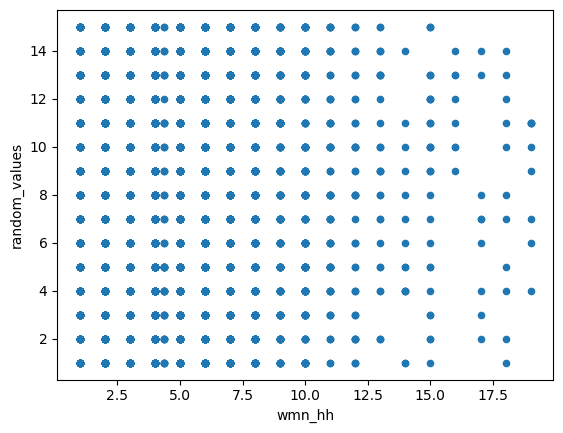

In [15]:
new_df = df[['wmn_hh', 'random_values']].copy()

print(new_df)
# Oblicz macierz korelacji
correlation_matrix = new_df.corr()
print("Macierz korelacji:")
print(correlation_matrix)
# Wykonaj wykres rozrzutu
df.plot.scatter(x='wmn_hh', y='random_values')


Zadanie 6

In [17]:
# Dodaj now kolumn ’ dochd na osob ’
df['wmn_hh_add_5'] = df['wmn_hh'] + 5
# Grupuj dane wedug kolumny ’region’ i oblicz redni dochd
grouped = df.groupby('country')['wmn_hh'].mean()
print(" Srednie wmn_hh w krajach:")
print(grouped)

# Posortuj dane wedug kolumny ’dochd’
df_sorted = df.sort_values(by='wmn_hh', ascending=False)
print("Dane posortowane wedug wmn_hh:")
print(df_sorted.head())

 Srednie wmn_hh w krajach:
country
Afghanistan                           4.857432
Albania                               4.318397
Algeria                               4.892541
Argentina                             3.774818
Bahrain                               5.333333
                                        ...   
Venezuela (Bolivarian Republic of)    4.142104
Viet Nam                              4.365854
Yemen                                 5.516393
Zambia                                6.000000
Zimbabwe                              4.930233
Name: wmn_hh, Length: 76, dtype: float64
Dane posortowane wedug wmn_hh:
            observation_id               submitted_time  gender  \
6086  wmn_5615059754811392  2020-07-16 21:48:51.644 UTC  Female   
5435  wmn_5493846818684928  2020-07-10 19:45:01.023 UTC  Female   
5016  wmn_5414602256154624  2020-07-09 22:34:15.536 UTC  Female   
5622  wmn_5527501175783424  2020-07-15 10:33:36.001 UTC  Female   
3858  wmn_5203932164128768  2020-07-11 10